<a href="https://colab.research.google.com/github/ailafelixa/Model-Breast-Cancer-Recurrence/blob/main/Aila_Modelo_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing packages



In [1]:
import pandas as pd
import numpy as np
!pip install dbfread
from dbfread import DBF
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando os dados originais

In [3]:
path_all_data = '/content/drive/MyDrive/Graduação/Décimo semestre/TCC II/Raw data/PACI00-15/pacigeral.dbf'

In [128]:
raw_data = DBF(path_all_data, encoding='ISO8859-1', raw=True)

In [56]:
len(raw_data)

1149055

In [6]:
column_names = raw_data.field_names

In [57]:
print(column_names)

['ESCOLARI', 'IDADE', 'SEXO', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'CATEATEND', 'DTCONSULT', 'CLINICA', 'DIAGPREV', 'DTDIAG', 'BASEDIAG', 'TOPO', 'TOPOGRUP', 'DESCTOPO', 'MORFO', 'DESCMORFO', 'EC', 'ECGRUP', 'T', 'N', 'M', 'PT', 'PN', 'PM', 'S', 'G', 'LOCALTNM', 'IDMITOTIC', 'PSA', 'GLEASON', 'OUTRACLA', 'META01', 'META02', 'META03', 'META04', 'DTTRAT', 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES', 'TRATFAPOS', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'NENHUMANT', 'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'DTULTINFO', 'ULTINFO', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG', 'CICI', 'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI', 'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO', 'DTRECIDIVA', 'RECNENHUM', 'RECLOCAL', 'RECREGIO', 'RECDIST', 'REC01', 'REC02', 'REC03', 'REC04', 'IBGEATEN', 'CIDO', 'DSC

### Filtrando dados a partir de 2018

In [129]:
# Specify the column name for which you want to list unique values
column_name = 'ANODIAG'

# Create a set to store unique values
unique_values = set()

# Iterate through the rows and collect unique values
for record in raw_data:
    unique_values.add(record[column_name])

# Print the different values
print(f"Different values in column '{column_name}':")
for value in unique_values:
    print(value)

Different values in column 'ANODIAG':
b'2014'
b'2022'
b'2000'
b'2010'
b'2023'
b'2018'
b'2007'
b'2004'
b'2021'
b'2008'
b'2019'
b'2015'
b'2003'
b'2002'
b'2016'
b'2009'
b'2013'
b'2017'
b'2001'
b'2020'
b'2011'
b'2006'
b'2012'
b'2005'


In [130]:
# Filtered records
filtered_records = [record for record in raw_data if 2018 <= int(record[column_name].decode('utf-8')) < 2023]

# Create a Pandas DataFrame from the filtered records
filtered_df = pd.DataFrame(filtered_records)

In [131]:
# Remove b' ' from all values in the DataFrame
filtered_df = filtered_df.applymap(lambda x: x.decode('latin-1') if isinstance(x, bytes) else x)

# Print the resulting DataFrame
filtered_df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
0,1,4,1,SP,SP,3536505,PAULINIA ...,2,20180323,25,...,,,,3509502,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,15,UNACON exclusiva de Oncologia Pedi trica com S...,2,1
1,1,1,1,SP,SP,3517604,GUAPIARA ...,1,20200904,25,...,,,,3552205,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,5,UNACON exclusiva de Oncologia Pedi trica ...,2,1
2,1,0,1,SP,SP,3550100,SAO MANUEL ...,2,20190905,28,...,,,,3507506,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,10,"UNACON com Servios de Radioterapia, de Hemato...",1,1
3,1,0,2,MT,SP,3549805,SAO JOSE DO RIO PRETO ...,2,20200812,25,...,,,,3549805,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,10,"UNACON com Servios de Radioterapia, de Hemato...",1,1
4,4,16,2,SP,SP,3550308,SAO PAULO ...,2,20190215,25,...,,,,3550308,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,7,CACON com Servio de Oncologia Pedi trica ...,3,2


In [171]:
df = deepcopy(filtered_df)

In [12]:
len(df) #Quantidade de linhas no dataset considerando apenas os anos de 2018, 2019, 2020, 2021 e 2022

251717

## Filtrando dataframe para retornar apenas casos de câncer de mama

A variável 'TOPOGRUP' contém a classificação CID-O (3a edição) para as neoplasias. Segundo o manual disponibilizado pela OMS, o grupo da topografia de câncer de mama é classificado pelo código C50.

In [172]:
df = df.loc[df['TOPOGRUP']== 'C50']

In [173]:
df['TOPOGRUP'].value_counts()

C50    34711
Name: TOPOGRUP, dtype: int64

## Análise exploratória

O conjunto de dados tem 99 variáveis diferentes. Todas elas estão mapeadas nessa planilha: [Mapeamento das features - Dados Fundação Oncocentro de São Paulo](https://docs.google.com/spreadsheets/d/1L2r1G277d4B9qrjMEpRDFxbuflEYIOLojrDajy)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34711 entries, 6 to 246087
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESCOLARI    34711 non-null  object
 1   IDADE       34711 non-null  object
 2   SEXO        34711 non-null  object
 3   UFNASC      34711 non-null  object
 4   UFRESID     34711 non-null  object
 5   IBGE        34711 non-null  object
 6   CIDADE      34711 non-null  object
 7   CATEATEND   34711 non-null  object
 8   DTCONSULT   34711 non-null  object
 9   CLINICA     34711 non-null  object
 10  DIAGPREV    34711 non-null  object
 11  DTDIAG      34711 non-null  object
 12  BASEDIAG    34711 non-null  object
 13  TOPO        34711 non-null  object
 14  TOPOGRUP    34711 non-null  object
 15  DESCTOPO    34711 non-null  object
 16  MORFO       34711 non-null  object
 17  DESCMORFO   34711 non-null  object
 18  EC          34711 non-null  object
 19  ECGRUP      34711 non-null  object
 20  T    

#### Convertendo as colunas para os tipos corretos

Todas as colunas estão como tipo 'object'. Para facilitar a análise exploratória, vamos converte-las para os tipos corretos.

In [175]:
## Convertendo colunas numéricas
numeric_columns = []
for col in df.columns:
    try:
        pd.to_numeric(df[col], downcast='integer', errors='raise')
        numeric_columns.append(col)
    except (ValueError, TypeError):
        pass

df[numeric_columns] = df[numeric_columns].astype(int)

In [176]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
6,9,28,2,SP,SP,3524402,JACAREI ...,2,20200728,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
10,9,38,2,SP,SP,3510500,CARAGUATATUBA ...,2,20210225,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
19,9,49,2,SP,SP,3524402,JACAREI ...,2,20210831,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
25,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,20190212,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
29,9,42,2,PE,SP,3546009,SANTA BRANCA ...,2,20211126,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1


In [177]:
df.DTCONSULT.head()

6     20200728
10    20210225
19    20210831
25    20190212
29    20211126
Name: DTCONSULT, dtype: int64

In [178]:
df.DTDIAG.head()

6     20200728
10    20210212
19    20211006
25    20190115
29    20210902
Name: DTDIAG, dtype: int64

In [179]:
df.DTULTINFO.head()

6     12/08/2022
10    18/07/2022
19    02/03/2022
25    21/11/2019
29    22/07/2022
Name: DTULTINFO, dtype: object

In [180]:
## Convertendo datas; os valores com data tem strings (******) onde a data não está disponível, então é necessário antes converter isso para NA

date_columns = ['DTCONSULT', 'DTDIAG', 'DTULTINFO', 'DTRECIDIVA']
df[date_columns] = df[date_columns].replace('********', np.nan)

# A coluna 'DTULTINFO' tem uma formatação diferente de data
date_formats = {
    'DTCONSULT': '%Y%m%d',
    'DTDIAG': '%Y%m%d',
    'DTULTINFO': '%d/%m/%Y',
    'DTRECIDIVA': '%Y%m%d'
}

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format=date_formats[col])

In [181]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
6,9,28,2,SP,SP,3524402,JACAREI ...,2,2020-07-28,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
10,9,38,2,SP,SP,3510500,CARAGUATATUBA ...,2,2021-02-25,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
19,9,49,2,SP,SP,3524402,JACAREI ...,2,2021-08-31,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
25,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2019-02-12,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
29,9,42,2,PE,SP,3546009,SANTA BRANCA ...,2,2021-11-26,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34711 entries, 6 to 246087
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ESCOLARI    34711 non-null  int64         
 1   IDADE       34711 non-null  int64         
 2   SEXO        34711 non-null  int64         
 3   UFNASC      34711 non-null  object        
 4   UFRESID     34711 non-null  object        
 5   IBGE        34711 non-null  int64         
 6   CIDADE      34711 non-null  object        
 7   CATEATEND   34711 non-null  int64         
 8   DTCONSULT   34711 non-null  datetime64[ns]
 9   CLINICA     34711 non-null  int64         
 10  DIAGPREV    34711 non-null  int64         
 11  DTDIAG      34711 non-null  datetime64[ns]
 12  BASEDIAG    34711 non-null  int64         
 13  TOPO        34711 non-null  object        
 14  TOPOGRUP    34711 non-null  object        
 15  DESCTOPO    34711 non-null  object        
 16  MORFO       34711 non

### Quantidade de linhas, colunas e primeiros e últimos registros da tabela



In [183]:
len(df)

34711

Após a filtragem específica para câncer de mama, ficamos com 34.711 registros

In [184]:
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
6,9,28,2,SP,SP,3524402,JACAREI ...,2,2020-07-28,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
10,9,38,2,SP,SP,3510500,CARAGUATATUBA ...,2,2021-02-25,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
19,9,49,2,SP,SP,3524402,JACAREI ...,2,2021-08-31,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
25,9,43,2,SP,SP,3543402,RIBEIRAO PRETO ...,2,2019-02-12,24,...,,,,3543402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1
29,9,42,2,PE,SP,3546009,SANTA BRANCA ...,2,2021-11-26,33,...,,,,3524402,80001,NEOPLASIA DE COMPORTAMENTO INCERTO SE BENIGNO ...,1,UNACON ...,1,1


In [185]:
df.tail()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2
243094,5,44,2,SP,SP,3547809,SANTO ANDRE ...,1,2019-09-06,33,...,,,,3550308,97143,LINFOMA ANAPLASICO DE GRANDES CELULAS T E NULL...,7,CACON com Servio de Oncologia Pedi trica ...,3,2
243188,2,33,2,SP,SP,3513801,DIADEMA ...,2,2019-07-29,33,...,,,,3550308,97193,LINFOMA NASAL E TIPO NASAL DE CELULAS TNK ...,6,CACON ...,3,2
243212,3,65,2,SP,SP,3556453,VARGEM GRANDE PAULISTA ...,2,2018-12-17,15,...,C77,C42,C74,3550308,97193,LINFOMA NASAL E TIPO NASAL DE CELULAS TNK ...,6,CACON ...,3,2
243343,4,55,2,PR,SP,3535309,PALMITAL ...,1,2020-07-29,24,...,,,,3525300,97293,LINFOMA LINFOBLASTICO DE CELULAS PRECURSORAS T...,7,CACON com Servio de Oncologia Pedi trica ...,3,2
246087,9,59,2,MG,SP,3509502,CAMPINAS ...,2,2021-01-15,33,...,,,,3509502,97401,MASTOCITOMA SOE ...,9,UNACON com Servios de Radioterapia e de Hemat...,1,1


In [186]:
df.shape

(34711, 99)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34711 entries, 6 to 246087
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ESCOLARI    34711 non-null  int64         
 1   IDADE       34711 non-null  int64         
 2   SEXO        34711 non-null  int64         
 3   UFNASC      34711 non-null  object        
 4   UFRESID     34711 non-null  object        
 5   IBGE        34711 non-null  int64         
 6   CIDADE      34711 non-null  object        
 7   CATEATEND   34711 non-null  int64         
 8   DTCONSULT   34711 non-null  datetime64[ns]
 9   CLINICA     34711 non-null  int64         
 10  DIAGPREV    34711 non-null  int64         
 11  DTDIAG      34711 non-null  datetime64[ns]
 12  BASEDIAG    34711 non-null  int64         
 13  TOPO        34711 non-null  object        
 14  TOPOGRUP    34711 non-null  object        
 15  DESCTOPO    34711 non-null  object        
 16  MORFO       34711 non

In [188]:
#Verificando se existem linhas duplicadas
df.duplicated().sum()

0

### Frequência da variável alvo

Como queremos predizer a recidiva, nossa label será a variável 'RECNENHUM', que infoma se o paciente teve recidiva (0) ou se não teve recidiva (1).

In [189]:
df['RECNENHUM'].value_counts()

1    32319
0     2392
Name: RECNENHUM, dtype: int64

Para facilitar a interpretação e deixar os casos positivos codificados como 1 e os negativos como zero, vamos criar uma nova coluna chamada 'REC'.

In [190]:
df['REC'] = df['RECNENHUM'].apply(lambda x: 1 if x == 0 else 0)

In [191]:
df['REC'].value_counts()

0    32319
1     2392
Name: REC, dtype: int64

In [192]:
df['RECNENHUM'].value_counts(normalize=True)

1    0.931088
0    0.068912
Name: RECNENHUM, dtype: float64

Podemos ver que o dataset é altamente desbalanceado, com apenas cerca de 7% dos casos com recidiva e ~93% sem recidiva

Temos também as variáveis 'RECLOCAL', 'RECREGIO' e 'RECDIST' que informam se a recidiva foi local, regional ou a distância (metástase)

In [193]:
df['RECLOCAL'].value_counts()

0    34115
1      596
Name: RECLOCAL, dtype: int64

In [194]:
df['RECREGIO'].value_counts()

0    34507
1      204
Name: RECREGIO, dtype: int64

In [195]:
df['RECDIST'].value_counts()

0    32720
1     1991
Name: RECDIST, dtype: int64

A frequência de recidiva regional é bastante baixa. A frequência de recidiva a distância compreende a maior parte dos casos.

#### Quantidade de dados por ano

In [196]:
df['ANODIAG'].value_counts()

2019    8820
2018    8797
2020    6709
2021    6619
2022    3766
Name: ANODIAG, dtype: int64

A maior parte dos registros é de 2019, seguido por 2019, 2020, 2021 e 2022, o último com apenas 3766 registros.

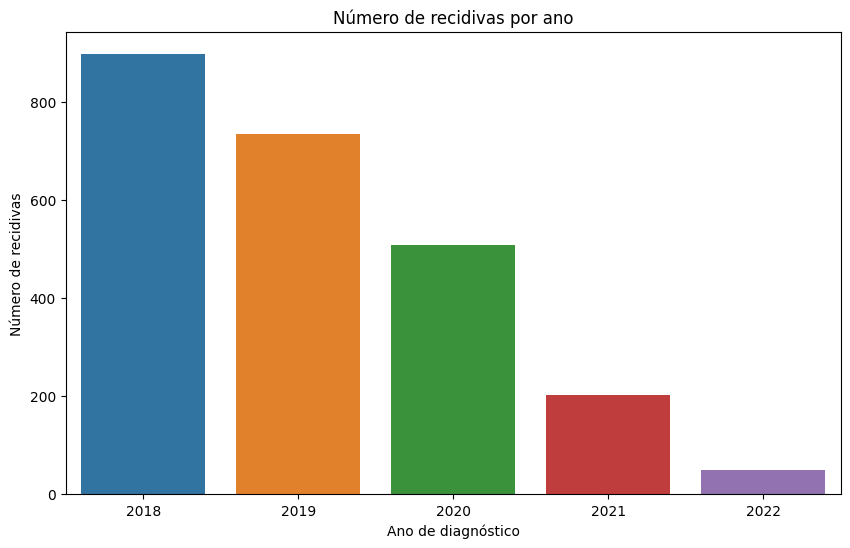

In [197]:
recurrence_counts = df.groupby('ANODIAG')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ANODIAG', y='REC', data=recurrence_counts)
plt.title('Número de recidivas por ano')
plt.xlabel('Ano de diagnóstico')
plt.ylabel('Número de recidivas')
plt.show()

A maior parte dos casos de recidiva que temos é de 2018. Isso porque, de acordo com a fundação oncocentro, os casos após 2018 ainda estão com registros em andamento.

#### Quantidade de topografias distintas

In [198]:
df['TOPO'].value_counts()

C504    8842
C509    8600
C508    7727
C502    2397
C500    2013
C501    1721
C505    1705
C503    1509
C506     197
Name: TOPO, dtype: int64

A topografia mais comum (8842 registros) é a C50.4, que se refere ao câncer de mama no quadrante superior externo da mama, seguido pelo C50.9 que se refere a glândula mamária. A topografia menos comum é a C50.6, onde o tumor se localiza no prolongamento axilar da mama

**C50 MAMA (exclui pele da mama C44.5)**

**C50.0 Mamilo**
Aréola

**C50.1 Porção central da mama**

**C50.2 Quadrante superior interno da mama**

**C50.3 Quadrante inferior interno da mama**

**C50.4 Quadrante superior externo da mama**

**C50.5 Quadrante inferior externo da mama**

**C50.6 Prolongamento axilar da mama**

**C50.8 Lesão sobreposta da mama**

Linha média da mama

Mama externa

Mama inferior

Mama interna

Mama superior

**C50.9 Mama, SOE (exclui pele da mama
C44.5)**
Glândula mamária

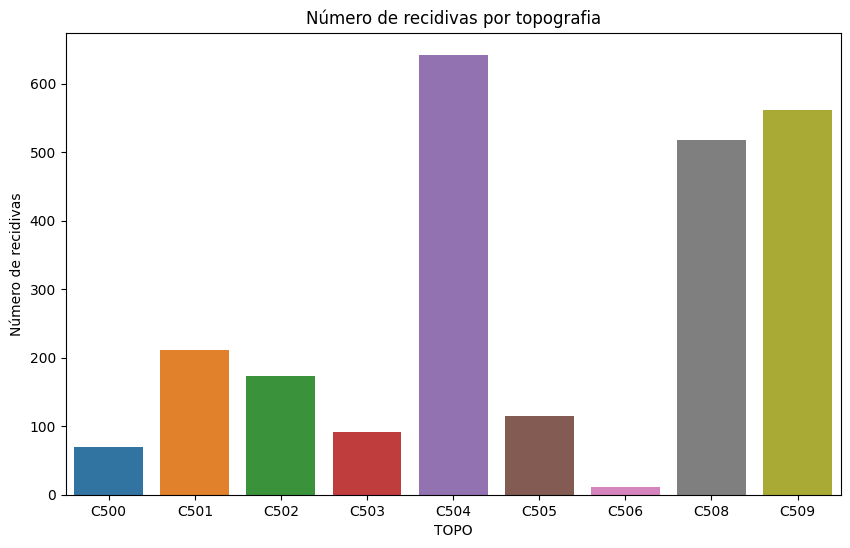

In [199]:
topo_recurrence_counts = df.groupby('TOPO')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TOPO', y='REC', data=topo_recurrence_counts)
plt.title('Número de recidivas por topografia')
plt.xlabel('TOPO')
plt.ylabel('Número de recidivas')
plt.show()

A topografia C50.4 parece estar presente na maior parte dos casos de recidiva

### Distribuição de idade e sexo

#### Idade

<Axes: xlabel='IDADE', ylabel='Count'>

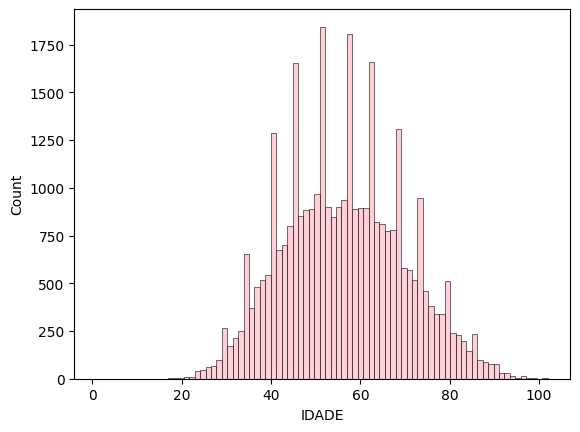

In [200]:
sns.histplot(x=df['IDADE'], color='pink')

A distribuição de idade parece seguir um padrão próximo a distribuição normal. Entretanto é relevante notar que existem alguns pontos em algumas faixas de idade onde a frequência é quase ou mais do que o dobro dos pontos ao redor. Um exemplo é o ponto ao redor dos 50 anos. Isso pode acontecer porque o screening obrigatório para câncer de mama começa aos 40 anos e as chances de câncer aumentam com a idade.

In [201]:
df['IDADE'].describe()

count    34711.000000
mean        56.297571
std         13.562862
min          1.000000
25%         46.000000
50%         56.000000
75%         66.000000
max        102.000000
Name: IDADE, dtype: float64

* A **média** de idade dos pacientes é de 56 anos, com um desvio padrão de 13 anos, ou seja, gira em torno de 43 a 69 anos.

* O **valor mínimo** é 1, o que pode ser um dado inserido incorretamente ou um caso de câncer infantil.

* A **idade máxima** foi 102 anos.

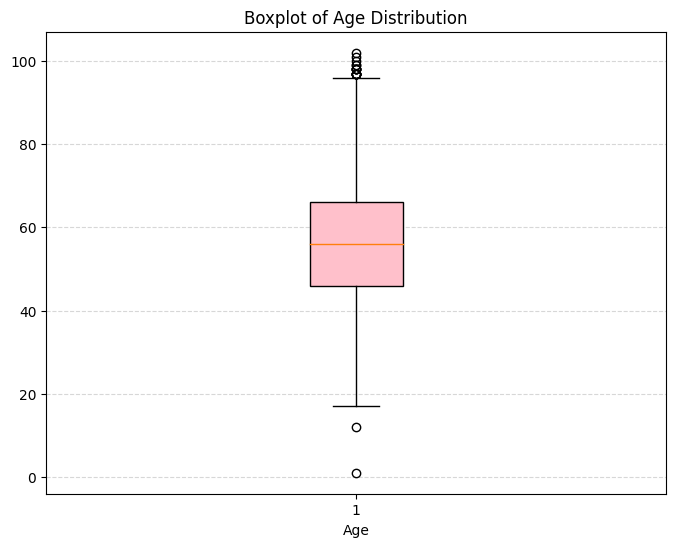

In [202]:
plt.figure(figsize=(8, 6))
bp = plt.boxplot(df['IDADE'], patch_artist=True)

for box in bp['boxes']:
    box.set(facecolor='pink')

plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)

plt.xlabel('Age')
plt.ylabel('')
plt.title('Boxplot of Age Distribution')

plt.show()

No boxplot é possível observar as informações descritas e que existem alguns outliers em idades < 20 e > 90, aproximadamente.

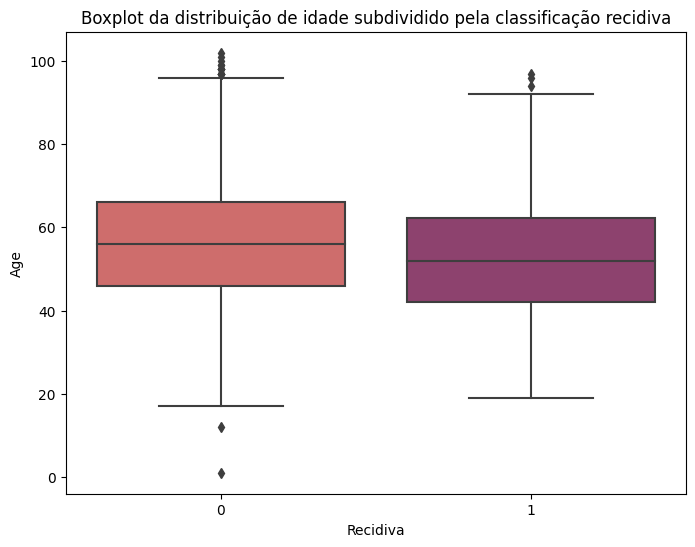

In [203]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='REC', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Recidiva')
plt.ylabel('Age')
plt.title('Boxplot da distribuição de idade subdividido pela classificação recidiva')

# Show the plot
plt.show()

Pacientes que tiveram recidiva possuem a faixa de idade parecida, apesar de levemente inferior, a dos pacientes  que não tiveram recidiva

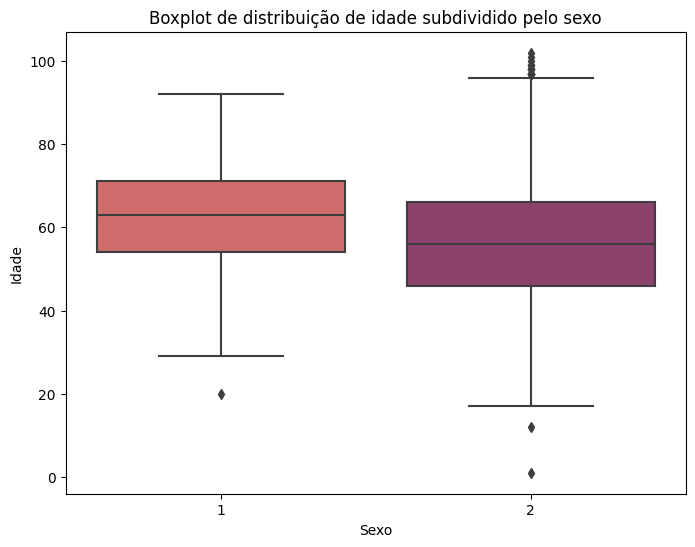

In [204]:
plt.figure(figsize=(8, 6))  # Set figure size
sns.boxplot(x='SEXO', y='IDADE', data=df, palette="flare")

# Add labels and title
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de distribuição de idade subdividido pelo sexo')

# Show the plot
plt.show()

A idade parece ser similar entre os diferentes subtipos tumorais e os diferentes anos de diagnóstico incluidos. Comparando a distribuição de idade entre câncer de mama feminino e masculino, é possível ver que o câncer de mama masculino (1) em geral se manifesta em uma idade mais elevada.

#### Sexo

In [205]:
df['SEXO'] = df['SEXO'].astype(int)

In [206]:
df['SEXO'].value_counts()

2    34387
1      324
Name: SEXO, dtype: int64

Como esperado, a frequência para casos de câncer de mama no sexo feminino corresponde a maioria dos dados.

In [207]:
proporcao_recidiva_feminina = (df[(df['SEXO'] == 2) & (df['REC'] == 1)].shape[0] / df[df['SEXO'] == 2].shape[0])*100
print(f"A proporção de pacientes femininas com recidiva é: {proporcao_recidiva_feminina:.2f}%")

A proporção de pacientes femininas com recidiva é: 6.92%


In [208]:
proporcao_recidiva_masculina = (df[(df['SEXO'] == 1) & (df['REC'] == 1)].shape[0] / df[df['SEXO'] == 1].shape[0])*100
print(f"A proporção de pacientes masculinos com recidiva é: {proporcao_recidiva_masculina:.2f}%")

A proporção de pacientes masculinos com recidiva é: 4.32%


A frequêcia de recidiva nesse caso também é proporcionalmente maior na população feminina do que na população masculina

### Categoria de atendimento

1 - CONVENIO

2 - SUS

3 – PARTICULAR

9 – SEM INFORMAÇÃO

In [209]:
df['CATEATEND'] = df['CATEATEND'].astype(int)

In [210]:
df['CATEATEND'].value_counts()

2    27324
1     7172
3      215
Name: CATEATEND, dtype: int64

A grande maioria dos pacientes do banco de dados foram atendidos pelo SUS.

20% dos registros são de pacientes com convênio e menos de 1% são de pacientes com atendimento ao diagnóstico particular

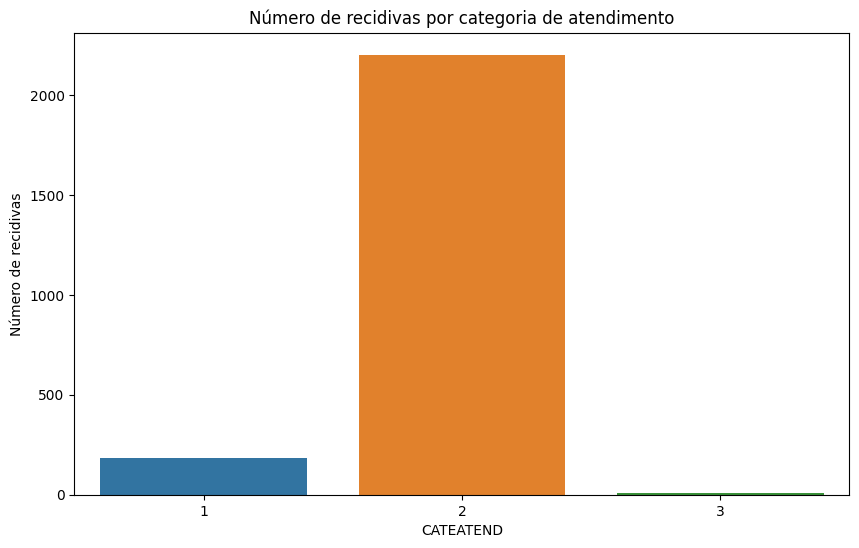

In [211]:
cateatend_recurrence_counts = df.groupby('CATEATEND')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CATEATEND', y='REC', data=cateatend_recurrence_counts)
plt.title('Número de recidivas por categoria de atendimento')
plt.xlabel('CATEATEND')
plt.ylabel('Número de recidivas')
plt.show()

In [212]:
proporcao_recidiva_sus = (df[(df['CATEATEND'] == 2) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 2].shape[0])*100
print(f"Proporção de recidiva em pacientes SUS: {proporcao_recidiva_sus:.2f}%")

Proporção de recidiva em pacientes SUS: 8.06%


In [213]:
proporcao_recidiva_convenio = (df[(df['CATEATEND'] == 1) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 1].shape[0])*100
print(f"Proporção de recidiva em pacientes Convenio: {proporcao_recidiva_convenio:.2f}%")

Proporção de recidiva em pacientes Convenio: 2.55%


In [214]:
proporcao_recidiva_particular = (df[(df['CATEATEND'] == 3) & (df['REC'] == 1)].shape[0] / df[df['CATEATEND'] == 3].shape[0])*100
print(f"Proporção de recidiva em pacientes Particular: {proporcao_recidiva_particular:.2f}%")

Proporção de recidiva em pacientes Particular: 3.26%


Como a maior parte dos dados do dataset são de pacientes SUS, a maior parte das recidivas também são representadas por esses pacientes.

### Escolaridade

1 – ANALFABETO

2 – ENS. FUND. INCOMPLETO

3 – ENS. FUND. COMPLETO

4 – ENSINO MÉDIO

5 – SUPERIOR

9 – IGNORADA

In [215]:
df['ESCOLARI'].value_counts()

4    8394
9    7890
2    7309
5    5374
3    4966
1     778
Name: ESCOLARI, dtype: int64

A maior parte dos pacientes tem apenas Ensino Médio ou escolaridade ignorada. Pacientes que possuem apenas ensino fundamental completo ou que são analfabetos estão em menor quantidade no conjunto de dados.

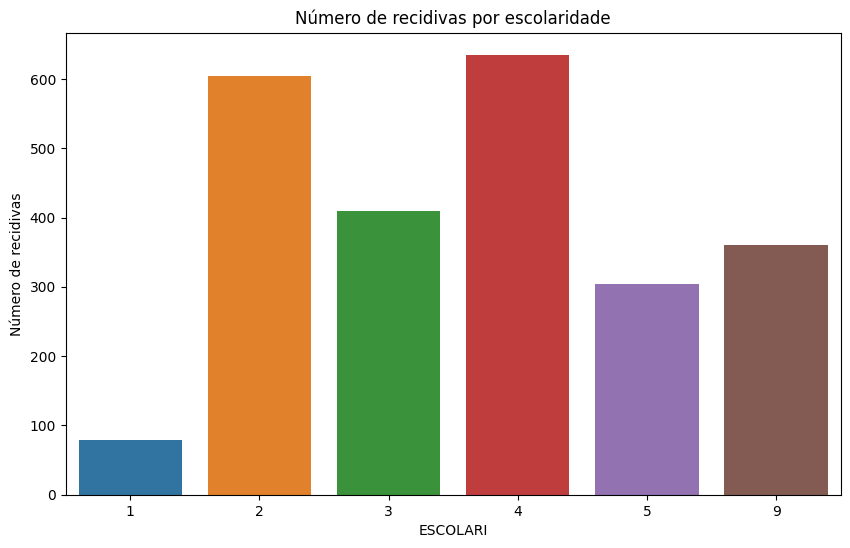

In [216]:
escolaridade_recurrence_counts = df.groupby('ESCOLARI')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ESCOLARI', y='REC', data=escolaridade_recurrence_counts)
plt.title('Número de recidivas por escolaridade')
plt.xlabel('ESCOLARI')
plt.ylabel('Número de recidivas')
plt.show()

In [217]:
proporcao_recidiva_1 = (df[(df['ESCOLARI'] == 1) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 1].shape[0])*100
print(f"Proporção de recidiva em pacientes analfabetos: {proporcao_recidiva_1:.2f}%")

Proporção de recidiva em pacientes analfabetos: 10.15%


In [218]:
proporcao_recidiva_2 = (df[(df['ESCOLARI'] == 2) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 2].shape[0])*100
print(f"Proporção de recidiva em pacientes fund. incompleto: {proporcao_recidiva_2:.2f}%")

Proporção de recidiva em pacientes fund. incompleto: 8.28%


In [219]:
proporcao_recidiva_3 = (df[(df['ESCOLARI'] == 3) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 3].shape[0])*100
print(f"Proporção de recidiva em pacientes fund. completo: {proporcao_recidiva_3:.2f}%")

Proporção de recidiva em pacientes fund. completo: 8.24%


In [220]:
proporcao_recidiva_4 = (df[(df['ESCOLARI'] == 4) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 4].shape[0])*100
print(f"Proporção de recidiva em pacientes com ensino médio: {proporcao_recidiva_4:.2f}%")

Proporção de recidiva em pacientes com ensino médio: 7.56%


In [221]:
proporcao_recidiva_5 = (df[(df['ESCOLARI'] == 5) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 5].shape[0])*100
print(f"Proporção de recidiva em pacientes com ensino superior: {proporcao_recidiva_5:.2f}%")

Proporção de recidiva em pacientes com ensino superior: 5.66%


In [222]:
proporcao_recidiva_9 = (df[(df['ESCOLARI'] == 9) & (df['REC'] == 1)].shape[0] / df[df['ESCOLARI'] == 9].shape[0])*100
print(f"Proporção de recidiva em pacientes com escolaridade ignorada: {proporcao_recidiva_9:.2f}%")

Proporção de recidiva em pacientes com escolaridade ignorada: 4.56%


A maior proporção de recidivas parece acontecer em pacientes analfabetos e com ensino fundamentos incompleto. Isso pode estar associado a condições de renda e acesso a saúde que podem ser fatores de risco em relação ao câncer

### Como os tipos de estadiamento se relacionam com a variável alvo?

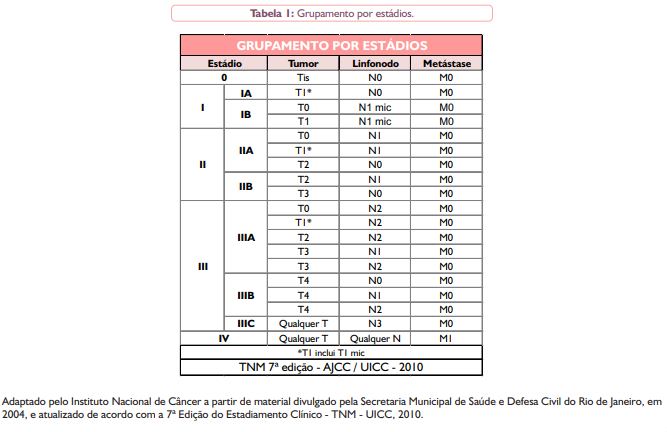

In [223]:
df.ECGRUP.value_counts()

II     11352
III     7978
I       7476
IV      3632
0       2658
X       1254
Y        361
Name: ECGRUP, dtype: int64

A maior parte dos pacientes está no estadiamente IA, onde existe um carcinoma in situ mas não existe metástase para linfonodos regionais ou a distância.

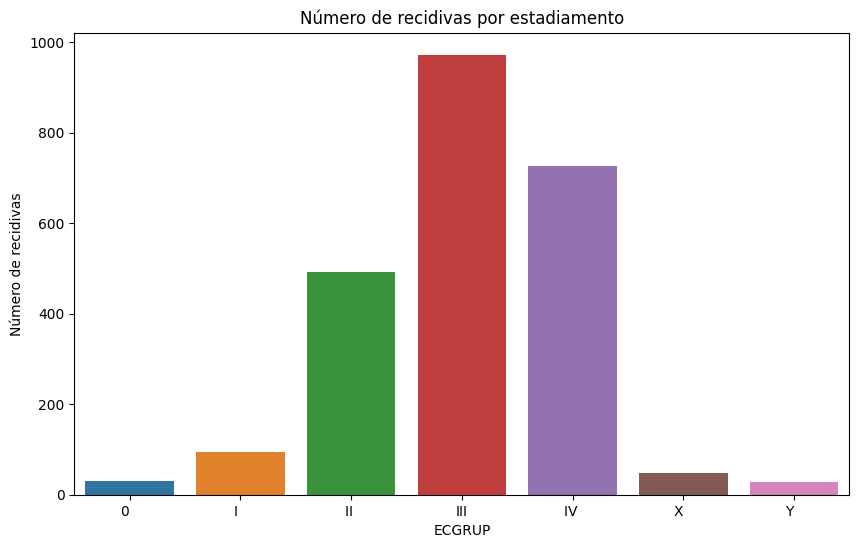

In [224]:
estadiamento_recurrence_counts = df.groupby('ECGRUP')['REC'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ECGRUP', y='REC', data=estadiamento_recurrence_counts)
plt.title('Número de recidivas por estadiamento')
plt.xlabel('ECGRUP')
plt.ylabel('Número de recidivas')
plt.show()

A maior parte dos pacientes que tiveram recidiva tinham tumores nos grupos de estadiamento III e IV.

### RRAS

As RRAS são as Redes Regionais de Atenção à Saúde do Estado de São Paulo e servem para organizar o cuidado ao câncer no Estado. Ao todo existem 17 RRAS, sendo que a maior parte dos serviços oncológicos se localizam na cidade de São Paulo (RRAS06).

In [225]:
df['RRAS'].value_counts()

6     10520
12     2856
13     2567
15     2252
1      1738
99     1737
7      1592
9      1546
2      1498
5      1338
8      1232
16     1166
17     1133
10     1075
11      787
4       749
14      642
3       283
Name: RRAS, dtype: int64

De fato, a maior parte dos registros se localiza na RRAS 06 que compreende o município de São Paulo, seguida pela RRAS 12 que compreende as regiões de Araçatuba e São José do Rio Preto.

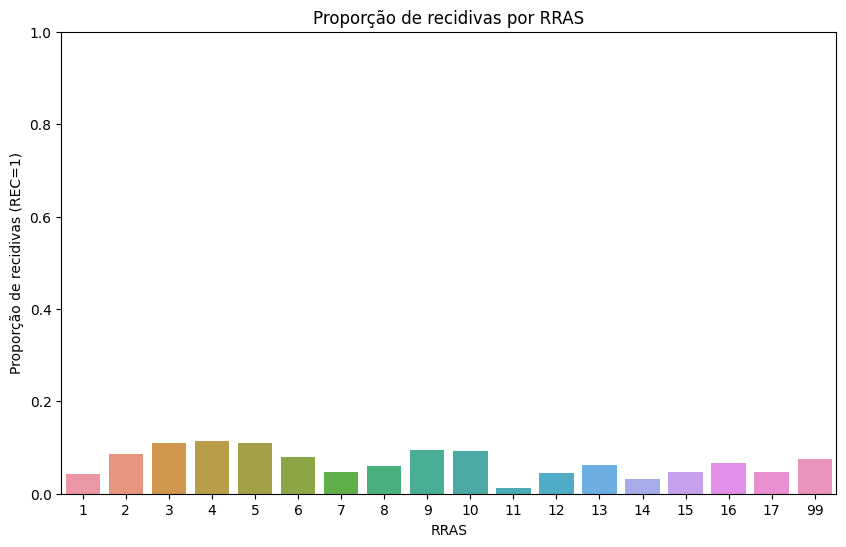

In [226]:
rras_recurrence_counts = df.groupby('RRAS')['REC'].mean().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='RRAS', y='REC', data=rras_recurrence_counts)
plt.title('Proporção de recidivas por RRAS')
plt.xlabel('RRAS')
plt.ylabel('Proporção de recidivas (REC=1)')
plt.ylim(0, 1)  # Define o limite do eixo Y para valores entre 0 e 1
plt.show()

A média de recidivas é maior na RRAS 3, 4 e 5. É interessante salientar que até outubro de 2020 a RRAS 03
e a RRAS 05, que é a região de saúde de Franco da Rocha e da rota dos bandeirantes, respectivamente, não possuiam nenhum serviço oncológico, o que ressalta a desigualdade de acesso a saúde no Estado de São Paulo. Já a RRAS04, que compreende 8 municípios da região de saúde 'Mananciais' possuia apenas 2 serviços oncológicos até 2020.

Fontes: [Termo de Referência para a estruturação de Redes Regionais de Atenção à Saúde no Estado de São Paulo](http://saude.sp.gov.br/resources/ses/perfil/gestor/homepage/redes-regionais-de-atencao-a-saude-no-estado-de-sao-paulo/redes-regionais-de-atencao-a-saude-rras/termo_de_referencia_redes_regionais.pdf)

[PLANO DE ATENÇÃO ONCOLÓGICA
DO ESTADO DE SÃO PAULO](https://www.saude.sp.gov.br/resources/ses/perfil/gestor/documentos-de-planejamento-em-saude/plano_estadual_de_oncologia_do_estado_de_sao_paulo-2020.pdf)

### Qual o período médio entre o diagnóstico e a recidiva

In [227]:
df['DTRECIDIVA'].value_counts()

2021-01-18    9
2021-02-02    9
2021-03-15    9
2021-04-15    9
2021-09-15    8
             ..
2019-11-21    1
2019-06-19    1
2019-09-04    1
2021-03-22    1
2019-07-05    1
Name: DTRECIDIVA, Length: 1099, dtype: int64

In [228]:
df['DATEDIFF_DIAG_REC'] = np.where(df['RECNENHUM'] == 0, (df['DTRECIDIVA'] - df['DTDIAG']).dt.days, np.nan)

In [229]:
df[['ESCOLARI', 'IDADE', 'SEXO', 'RECNENHUM', 'DTDIAG', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC']].loc[df['RECNENHUM']==0].head()

,ESCOLARI,IDADE,SEXO,RECNENHUM,DTDIAG,DTRECIDIVA,DATEDIFF_DIAG_REC
721,4,56,2,0,2018-06-04,2018-10-25,143.0
3830,9,69,2,0,2018-04-20,2021-10-15,1274.0
4195,4,39,2,0,2018-09-29,2021-10-20,1117.0
4200,5,39,2,0,2019-07-23,2019-07-23,0.0
4202,4,39,2,0,2021-08-25,2022-09-17,388.0


In [230]:
df[['ESCOLARI', 'IDADE', 'SEXO', 'RECNENHUM', 'DTDIAG', 'DTRECIDIVA', 'DATEDIFF_DIAG_REC']].loc[df['RECNENHUM']==0].tail()

,ESCOLARI,IDADE,SEXO,RECNENHUM,DTDIAG,DTRECIDIVA,DATEDIFF_DIAG_REC
231186,3,72,2,0,2019-01-23,2020-01-22,364.0
239072,4,67,2,0,2018-05-16,2022-06-07,1483.0
239904,4,46,2,0,2018-03-27,2022-03-21,1455.0
243188,2,33,2,0,2019-07-17,2020-04-27,285.0
243212,3,65,2,0,2019-01-09,2019-07-05,177.0


Em alguns dados a data de recidiva está menor do que a data do diagnóstico. Provavelmente são erros no preenchimento dos dados (?)

In [231]:
df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']<0].describe()

count      11.000000
mean     -236.727273
std       391.302208
min     -1212.000000
25%      -279.000000
50%       -31.000000
75%       -10.500000
max        -1.000000
Name: DATEDIFF_DIAG_REC, dtype: float64

In [232]:
df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']>0].describe()

count    2355.000000
mean      553.845011
std       353.676710
min         1.000000
25%       288.000000
50%       490.000000
75%       769.000000
max      1793.000000
Name: DATEDIFF_DIAG_REC, dtype: float64

<Axes: xlabel='DATEDIFF_DIAG_REC', ylabel='Count'>

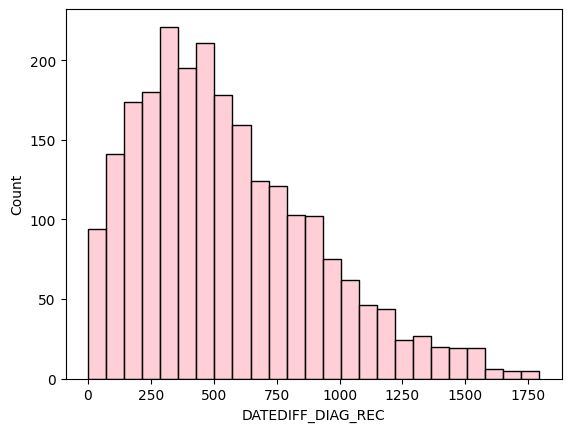

In [233]:
sns.histplot(df['DATEDIFF_DIAG_REC'].loc[df['DATEDIFF_DIAG_REC']>0], color='pink')

Mesmo com os outliers, é possível verificar que a mediana do tempo entre o diagnóstico e a última recidiva é de cerca de 500 dias após o diagnóstico, podendo chegar a mais de 1500 dias (cerca de 4 anos). A distribuição é bastante direcionada para a direita.